<a href="https://colab.research.google.com/github/mbmarcin/ml_/blob/main/ml_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd 
df = pd.read_csv('bank-additional-full.csv', delimiter=';', decimal=',')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no


In [2]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [3]:

from sklearn import preprocessing
num = preprocessing.LabelEncoder()

num.fit(["admin.","blue-collar","entrepreneur","housemaid","management",
         "retired","self-employed","services","student","technician","unemployed","unknown"])
df['job']=num.transform(df['job']).astype('int')

num.fit(["divorced","married","single","unknown"])
df['marital']=num.transform(df['marital']).astype('int')

num.fit(["basic.4y","basic.6y","basic.9y","high.school","illiterate","professional.course","university.degree","unknown"])
df['education']=num.transform(df['education']).astype('int')

num.fit(["no","yes","unknown"])
df['housing']=num.transform(df['housing']).astype('int')

num.fit(["no","yes","unknown"])
df['loan']=num.transform(df['loan']).astype('int')

num.fit(["failure","nonexistent","success"])
df['poutcome']=num.transform(df['poutcome']).astype('int')

num.fit(["yes","no"])
df['y']=num.transform(df['y']).astype('int')

df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,1,0,no,0,0,telephone,may,mon,261,1,999,0,1,1.1,93.994,-36.4,4.857,5191,0
1,57,7,1,3,unknown,0,0,telephone,may,mon,149,1,999,0,1,1.1,93.994,-36.4,4.857,5191,0
2,37,7,1,3,no,2,0,telephone,may,mon,226,1,999,0,1,1.1,93.994,-36.4,4.857,5191,0
3,40,0,1,1,no,0,0,telephone,may,mon,151,1,999,0,1,1.1,93.994,-36.4,4.857,5191,0
4,56,7,1,3,no,0,2,telephone,may,mon,307,1,999,0,1,1.1,93.994,-36.4,4.857,5191,0


In [4]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

df['cons.price.idx'] = scaler.fit_transform(df[['cons.price.idx']]).reshape(-1,1)
df['cons.conf.idx'] = scaler.fit_transform(df[['cons.conf.idx']]).reshape(-1,1)
df['euribor3m'] = scaler.fit_transform(df[['euribor3m']]).reshape(-1,1)

df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,1,0,no,0,0,telephone,may,mon,261,1,999,0,1,1.1,0.722722,0.886447,0.71246,5191,0
1,57,7,1,3,unknown,0,0,telephone,may,mon,149,1,999,0,1,1.1,0.722722,0.886447,0.71246,5191,0
2,37,7,1,3,no,2,0,telephone,may,mon,226,1,999,0,1,1.1,0.722722,0.886447,0.71246,5191,0
3,40,0,1,1,no,0,0,telephone,may,mon,151,1,999,0,1,1.1,0.722722,0.886447,0.71246,5191,0
4,56,7,1,3,no,0,2,telephone,may,mon,307,1,999,0,1,1.1,0.722722,0.886447,0.71246,5191,0


In [7]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE

X = np.asarray(df[['age', 'job', 'marital', 'education', 'housing', 'loan', 
                   'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m']])
y = np.asarray(df['y'])
rfc = RandomForestClassifier(n_estimators=40)
rfe = RFE(rfc, 6)
rfe_fit = rfe.fit(X, y)

print("Num Features: %s" % (rfe_fit.n_features_))
print("Selected Features: %s" % (rfe_fit.support_))
print("Feature Ranking: %s" % (rfe_fit.ranking_))

Num Features: 6
Selected Features: [ True  True False  True False False  True False  True  True]
Feature Ranking: [1 1 3 1 2 4 1 5 1 1]


In [9]:
from imblearn.over_sampling import SMOTE

sm=SMOTE(ratio='auto', kind='regular')
X_sampled,y_sampled=sm.fit_sample(X,y)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [11]:
Sampled_no = len(y_sampled[y_sampled==0])
Sampled_yes = len(y_sampled[y_sampled==1])
print([Sampled_no],[Sampled_yes])

[36548] [36548]


In [16]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_sampled,y_sampled,test_size=0.3,random_state=0)


In [17]:
from sklearn.metrics import f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

lr = LogisticRegression(C=1, solver='lbfgs')
clf = SVC(kernel='rbf', gamma='auto')
dtree = DecisionTreeClassifier(criterion="entropy", max_depth=4)
rfc = RandomForestClassifier(n_estimators=40)

def scorer(i,j,k,l):
    for every in (i,j,k,l):
        every.fit(X_train,y_train)
        print (every.__class__.__name__, 'F1 score =', f1_score(y_test,every.predict(X_test)))
scorer (lr,clf,dtree,rfc)

LogisticRegression F1 score = 0.7110189027201474
SVC F1 score = 0.7650319829424307
DecisionTreeClassifier F1 score = 0.7122124274349602
RandomForestClassifier F1 score = 0.9238722664470674


In [18]:
from sklearn.metrics import classification_report
yhat = rfc.predict(X_test)
print(classification_report(y_test,yhat))

              precision    recall  f1-score   support

           0       0.91      0.94      0.92     10857
           1       0.94      0.91      0.92     11072

    accuracy                           0.92     21929
   macro avg       0.92      0.92      0.92     21929
weighted avg       0.92      0.92      0.92     21929



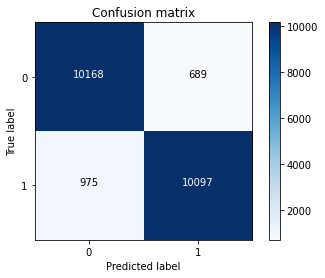

In [19]:
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')

plot_confusion_matrix(confusion_matrix(y_test, yhat), classes=['0','1'],normalize= False,  title='Confusion matrix')